# Data understanding

To start, we are going to explore the data received and start transforming the raw data to a more cleaned and organized data.

Lets start by importing and reading the raw data given.

In [87]:
import pandas as pd

file_path = './data/dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Date_published,Headline,Synopsis,Full_text,Final Status
0,2022-06-21,"Banks holding on to subsidy share, say payment...",The companies have written to the National Pay...,ReutersPayments companies and banks are at log...,Negative
1,2022-04-19,Digitally ready Bank of Baroda aims to click o...,"At present, 50% of the bank's retail loans are...",AgenciesThe bank presently has 20 million acti...,Positive
2,2022-05-27,Karnataka attracted investment commitment of R...,Karnataka is at the forefront in attracting in...,PTIKarnataka Chief Minister Basavaraj Bommai.K...,Positive
3,2022-04-06,Splitting of provident fund accounts may be de...,The EPFO is likely to split accounts only at t...,Getty ImagesThe budget for FY22 had imposed in...,Negative
4,2022-06-14,Irdai weighs proposal to privatise Insurance I...,"Set up in 2009 as an advisory body, IIB collec...",AgenciesThere is a view in the insurance indus...,Positive


### Dataset information

In [88]:
num_rows, num_cols = df.shape
column_names = df.columns.to_list()

data_types = df.dtypes

# Display the information
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("Column names:", column_names)
print("\nData types of columns:")
print(data_types)

Number of rows: 400
Number of columns: 5
Column names: ['Date_published', 'Headline', 'Synopsis', 'Full_text', 'Final Status']

Data types of columns:
Date_published    object
Headline          object
Synopsis          object
Full_text         object
Final Status      object
dtype: object


Lets analyse the category type of each column in the dataset.

In [89]:
# Initialize empty dictionaries to store column categories
categorical_cols = {}
continuous_cols = {}
discrete_cols = {}

# Iterate over each column and categorize based on data type and unique value count
for column in df.columns:
    unique_count = df[column].nunique()
    if data_types[column] == 'object' or unique_count <= 10:
        categorical_cols[column] = unique_count
    elif data_types[column] in ['int64', 'float64']:
        if unique_count <= 10:
            discrete_cols[column] = unique_count
        else:
            continuous_cols[column] = unique_count

# Display categorized columns
print(f"Categorical columns: {categorical_cols}")
print(f"Continuous columns: {continuous_cols}")
print(f"Discrete columns: {discrete_cols}")

Categorical columns: {'Date_published': 75, 'Headline': 368, 'Synopsis': 398, 'Full_text': 400, 'Final Status': 3}
Continuous columns: {}
Discrete columns: {}


### Missing values

Lets check if there are any missing values in the dataset.

In [90]:
missing_values = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values)
print("Total records    ", len(df))

Missing values count in each column:
Date_published    0
Headline          0
Synopsis          1
Full_text         0
Final Status      0
dtype: int64
Total records     400


As we can see, there is a mmissing value in a record that has no synopsis. Lets chec the record and deal with this.

In [91]:
# print missing value
df[df.isnull().any(axis=1)]

,Date_published,Headline,Synopsis,Full_text,Final Status
56,2022-04-08,RBI keeps repo rate unchanged; reduces growth ...,NaN,ANIStory outlineThe benchmark repo rate stands...,Negative


Substitue the missing value of the records with a NaN synopsis by an empty string.

In [92]:
df['Synopsis'][56] = ""

Check if the missing value is still present in record of index 56.

In [93]:
# print missing value
df[df.isnull().any(axis=1)]

,Date_published,Headline,Synopsis,Full_text,Final Status


As we can see, there are no more missing values in the dataset.

In [94]:
missing_values = df.isnull().sum()

print("Missing values count in each column:")
print(missing_values)
print("Total records    ", len(df))

Missing values count in each column:
Date_published    0
Headline          0
Synopsis          0
Full_text         0
Final Status      0
dtype: int64
Total records     400


### Unique values

Now, we are going to analyse the number of unique values in each column.

In [95]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}' ({len(unique_values)} results found):")
    print(unique_values)
    print()

Unique values in column 'Date_published' (75 results found):
['2022-06-21' '2022-04-19' '2022-05-27' '2022-04-06' '2022-06-14'
 '2022-05-13' '2022-05-25' '2022-04-27' '2022-06-13' '2022-05-07'
 '2022-06-20' '2022-05-31' '2022-06-09' '2022-06-08' '2022-04-18'
 '2022-06-17' '2022-04-12' '2022-06-29' '2022-04-09' '2022-06-11'
 '2022-06-05' '2022-04-04' '2022-06-06' '2022-05-21' '2022-05-19'
 '2022-05-24' '2022-06-02' '2022-05-10' '2022-06-07' '2022-05-30'
 '2022-05-16' '2022-06-18' '2022-05-14' '2022-06-16' '2022-06-23'
 '2022-04-24' '2022-04-11' '2022-06-28' '2022-04-13' '2022-04-21'
 '2022-04-08' '2022-04-07' '2022-05-11' '2022-04-23' '2022-04-25'
 '2022-04-01' '2022-06-25' '2022-04-29' '2022-06-01' '2022-05-02'
 '2022-04-20' '2022-05-12' '2022-05-17' '2022-06-26' '2022-06-03'
 '2022-06-22' '2022-05-05' '2022-05-09' '2022-05-04' '2022-05-26'
 '2022-04-17' '2022-05-18' '2022-06-24' '2022-06-30' '2022-06-10'
 '2022-04-26' '2022-06-27' '2022-04-05' '2022-05-06' '2022-06-15'
 '2022-04-22' '

By analysing the unique values in each column, we can get to some conclusions:

1. In the **'Date_published'** column we can see that the news on this dataset goes from the day '01-04-2022' to the day '30-06-2022' (3 full months of data news).
2. In the **'Headline'** column, there are some news that have the same headline (check if they are duplicates or the synopysys or full-text differ between them).
3. In the **'Synopsis'** and **'Full_text'** columns it's noticible the presence of special characters.
4. The **'Final Score'** column has a low and finite number of possible solutions. This means that this column can be transformed to an integer range of values. But first we need to handle the only record with a mispealed _Final\_Status_ value ('Positive ').

Now, lets see if the dataset is balanced.

In [96]:
final_status_distribution = df['Final Status'].value_counts()

print(final_status_distribution)

final_status_proportion = final_status_distribution / final_status_distribution.sum()

print()
print(final_status_proportion)

Positive     215
Negative     184
Positive       1
Name: Final Status, dtype: int64

Positive     0.5375
Negative     0.4600
Positive     0.0025
Name: Final Status, dtype: float64


As we can see here, the code is separating one of the positive records from the other positive records. This is because the single positive record has an extra space in the end and the other don't. So, we have to deal with this by removing all the unnecessary characters.

In [97]:
import re
import unidecode

# Remove accents and punctuation
for column in ['Headline', 'Synopsis', 'Full_text']:
    df[column] = df[column].apply(lambda record: unidecode.unidecode(record))   # Remove accents
    df[column].apply(lambda record: re.sub('[^a-zA-Z0-9]', ' ', record))        # Remove punctuation without removing numbers

df['Final Status'] = df['Final Status'].str.strip()   # Trimming Spaces
df['Final Status'] = df['Final Status'].str.lower()   # Case Normalization    

lets check the dataset.

In [98]:
df.head()

,Date_published,Headline,Synopsis,Full_text,Final Status
0,2022-06-21,"Banks holding on to subsidy share, say payment...",The companies have written to the National Pay...,ReutersPayments companies and banks are at log...,negative
1,2022-04-19,Digitally ready Bank of Baroda aims to click o...,"At present, 50% of the bank's retail loans are...",AgenciesThe bank presently has 20 million acti...,positive
2,2022-05-27,Karnataka attracted investment commitment of R...,Karnataka is at the forefront in attracting in...,PTIKarnataka Chief Minister Basavaraj Bommai.K...,positive
3,2022-04-06,Splitting of provident fund accounts may be de...,The EPFO is likely to split accounts only at t...,Getty ImagesThe budget for FY22 had imposed in...,negative
4,2022-06-14,Irdai weighs proposal to privatise Insurance I...,"Set up in 2009 as an advisory body, IIB collec...",AgenciesThere is a view in the insurance indus...,positive


Lets check if now there are only two possible values for the _Final\_Status_ column (_Positive_ and _Negative_).

In [99]:
final_status_distribution = df['Final Status'].value_counts()

print(final_status_distribution)

final_status_proportion = final_status_distribution / final_status_distribution.sum()

print()
print(final_status_proportion)

positive    216
negative    184
Name: Final Status, dtype: int64

positive    0.54
negative    0.46
Name: Final Status, dtype: float64


In [100]:
import plotly.express as px

status_counts = df['Final Status'].value_counts()
status_counts_df = pd.DataFrame(status_counts).reset_index()

fig = px.pie(status_counts_df, values='Final Status', names='index', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

As we can see, the dataset is almost balanced. This slight imbalance will probably not affect significantly the model's performance.

### Exploratory analysis

Firstly, as the dataset consists of news of 3 full months, lets start by exploring the publication data of each news article, in order to identify trends or patterns in publication frequency over time, and to explore how sentiments vary accross the different time periods.

In [101]:
import matplotlib.pyplot as plt

df['Date_published'] = pd.to_datetime(df['Date_published'])    # Convert from string to datetime format

daily_counts = df.groupby(df['Date_published'].dt.date).size()
monthly_counts = df.groupby(df['Date_published'].dt.to_period('M')).size()

Plotting the news by days.

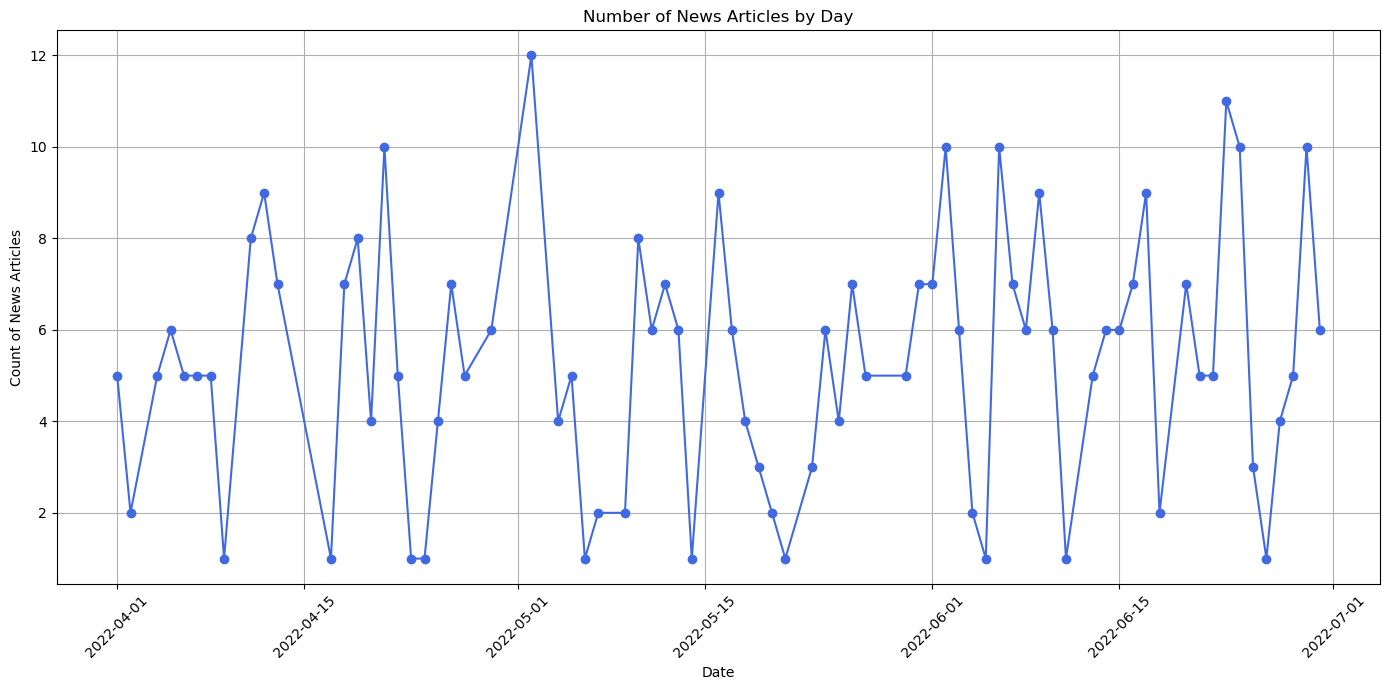

In [102]:
plt.figure(figsize=(14, 7))
daily_counts.plot(kind='line', marker='o', color='royalblue')
plt.title('Number of News Articles by Day')
plt.xlabel('Date')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

- In this graph (number of news per day), we can see that the number of publications per day ranges between 1 and 12 articles published.
- We also can conclude that the news publication date range from April 2022 to June 2022.
- Does not seem there is a clear pattern of news publication during this time period, as the peaks occur irregularly.

Plotting the news by months.

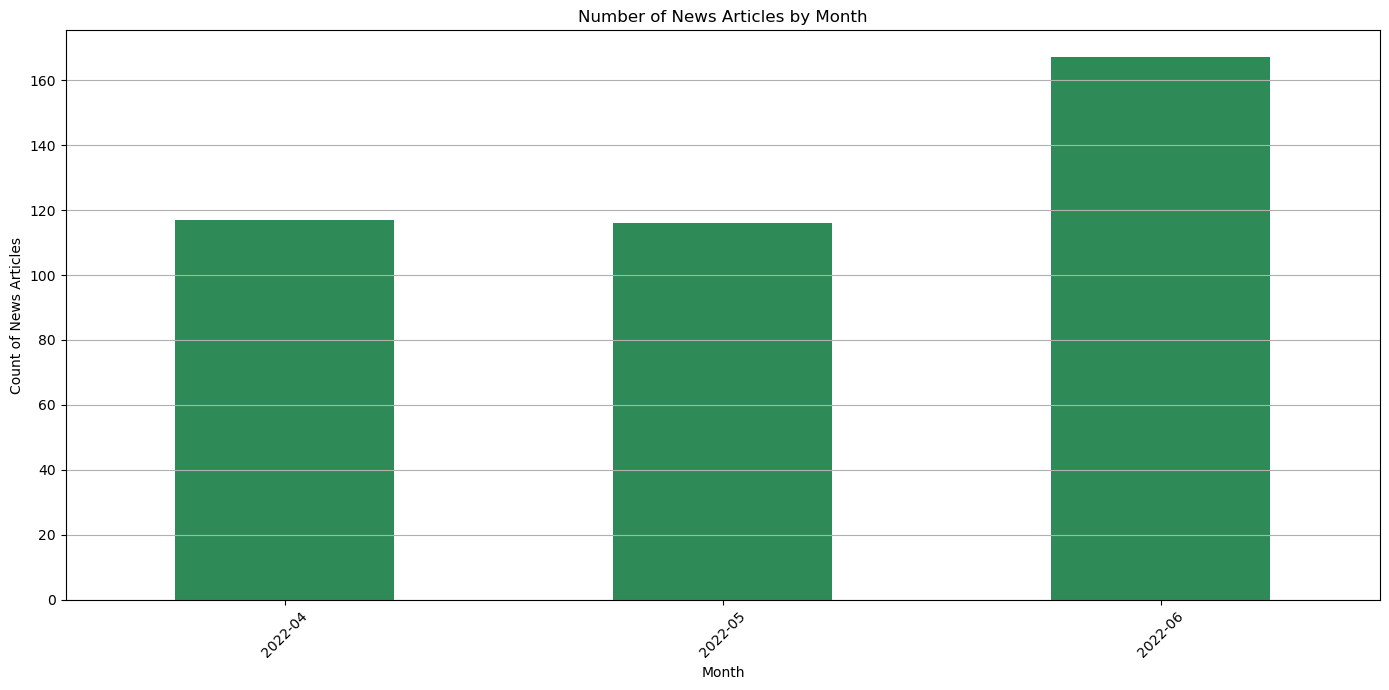

In [103]:
plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='bar', color='seagreen')
plt.title('Number of News Articles by Month')
plt.xlabel('Month')
plt.ylabel('Count of News Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

- In this barchart, we can see that, in April and May months, the total number of publications is practically the same but, in June, the total number of publications increased rapidly.

Now, lets see what languages our dataset has by using the _DetectorFactory_ python library.

In [105]:
# Join the 'Headline', 'Synopsis' and 'Full_text' columns into a single column ('Complete_text')
df['Complete_text'] =  df['Headline'] + ' ' + df['Synopsis'] + ' ' + df['Full_text']
df.reset_index(drop=True, inplace=True)

corpus = []
for i in range(0, df['Complete_text'].size):
    corpus.append(df['Complete_text'][i])

print(corpus)

['Banks holding on to subsidy share, say payments firms The companies have written to the National Payments Corp. of India (NPCI), complaining that a,1700 crore of the a,11,500 crore granted in the budget is being retained by banks. ReutersPayments companies and banks are at loggerheads over the sharing of government-granted subsidies for building payment infrastructure, said three people with knowledge of the matter. \r\n\r\nThe companies have written to the National Payments Corp. of India (NPCI), complaining that a,1700 crore of the a,11,500 crore granted in the budget is being retained by banks, they said. This has deprived companies connecting up the last mile of state-promised revenues, according to them. The government granted the subsidies in exchange for waiving Merchant Discount Rate (MDR) charges.\r\n\r\n"The government has released a,1700 crore worth of subsidies to banks but they are not sharing it with any payment aggregators," said the CEO of a payments company on condit

In [106]:
from langdetect import detect, DetectorFactory
from langcodes import Language

DetectorFactory.seed = 0   # To get consistent results

def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Function to convert ISO 639-1 codes to full language names
def get_full_language_name(iso_code):
    try:
        return str(Language.get(iso_code).display_name())
    except:
        return None    

df['language'] = df['Complete_text'].apply(detect_language)   # Apply language detection
df['language'] = df['language'].apply(get_full_language_name)    # Convert the languages code to the correspondant full extended language name (e.g., pt -> portuguese)

language_counts = df['language'].value_counts()
print(language_counts)

English    400
Name: language, dtype: int64


In [ ]:
import plotly.express as px

status_counts = df['language'].value_counts()
status_counts_df = pd.DataFrame(status_counts).reset_index()

fig = px.pie(status_counts_df, values='language', names='index', hole=0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

As we can see, all news are in _English_, so there is no need to apply translation in the dataset.

#### Removing stop words

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

print(stopwords.words('english'))

In [ ]:
# list of negative words to be removed from the set stop words, since they may convey sentiment

negative_words = {
    "no",
    "not",
    "none",
    "neither",
    "never",
    "nobody",
    "nothing",
    "nowhere",
    "doesn't",
    "isn't",
    "wasn't",
    "shouldn't",
    "won't",
    "can't",
    "couldn't",
    "don't",
    "haven't",
    "hasn't",
    "hadn't",
    "aren't",
    "weren't",
    "wouldn't",
    "daren't",
    "needn't",
    "didn't",
    "without",
    "against",
    "negative",
    "deny",
    "reject",
    "refuse",
    "decline",
    "unhappy",
    "sad",
    "miserable",
    "hopeless",
    "worthless",
    "useless",
    "futile",
    "disagree",
    "oppose",
    "contrary",
    "contradict",
    "disapprove",
    "dissatisfied",
    "objection",
    "unsatisfactory",
    "unpleasant",
    "regret",
    "resent",
    "lament",
    "mourn",
    "grieve",
    "bemoan",
    "despise",
    "loathe",
    "detract",
    "abhor",
    "dread",
    "fear",
    "worry",
    "anxiety",
    "sorrow",
    "gloom",
    "melancholy",
    "dismay",
    "disheartened",
    "despair",
    "dislike",
    "aversion",
    "antipathy",
    "hate",
    "disdain",
}
sw = set(stopwords.words("english"))
stop_words = sw - negative_words

Using this stop word list (which does include words that perhaps we should *not* remove, such as negation terms), we can considerably reduce the size of our corpus.

In [ ]:
# your code here

vocab = set()

for sent in corpus:
    vocab.update(sent.split())

# Store the intial size of the corpus before removing the stop words
corpus_bf_stop_words_count = len(vocab)

print('len(corpus before stop words removal) = ', corpus_bf_stop_words_count)

corpus = [' '.join([word for word in sent.split() if word not in stopwords.words('english')]) for sent in corpus]
print('-------')
print('len(new_corpus) = ', len(corpus))
corpus

### Wordclouds

Now, lets see what are the most common words in the dataset. First, lets join the columns **Headline**, **Synopsis** and **Full Text**.

In [ ]:
df_wc = df.copy()
df_wc['Complete_text'] =  df_wc['Headline'] + ' ' + df_wc['Synopsis'] + ' ' + df_wc['Full_text']   # Concatenate the text columns
df_wc.drop(columns=['Headline', 'Synopsis', 'Full_text'], inplace=True)   # Drop the original text columns

Compute the result dataset.

In [ ]:
df_wc.head()

Now, lets compute the most used words in general.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white'
).generate(" ".join(df_wc['Complete_text'].dropna().values))

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

Following this, lets compute the words most used in each class (_Positive_ and _Negative_) of the **Final Status** column.

In [ ]:
def generate_wordcloud(corpus):
    wordcloud = WordCloud(
        width=400, height=200,
        background_color='white'
    ).generate(corpus)
    return wordcloud

# Generate word clouds for positive and negative classes
positive_corpus_str = " ".join(df_wc[df_wc['Final Status'] == 'positive']['Complete_text'].dropna().values)
negative_corpus_str = " ".join(df_wc[df_wc['Final Status'] == 'negative']['Complete_text'].dropna().values)

# Convert the negative and positive corpus to sets of words
positive_words = set(positive_corpus_str.split())
negative_words = set(negative_corpus_str.split())

positive_wordcloud = generate_wordcloud(positive_corpus_str)
negative_wordcloud = generate_wordcloud(negative_corpus_str)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title(f'Positive Class Word Cloud ({len(positive_words)} words)')
axs[0].axis('off')  # Hide the axes

# Plot negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title(f'Negative Class Word Cloud ({len(negative_words)} words)')
axs[1].axis('off')

# Add spacing between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()

As we can see, we notice some words are unecessary. Like, for example, the words _per cent_ and _India_ in the negative class. Lets remove the common words from both classes. 

In [ ]:
import string

# Pattern that matches punctuation except periods within numbers
pattern = r'(?<!\d)[.,;:!?"\'`-](?!\d)'

# Remove punctuation from positive_words and negative_words arrays
positive_words = {re.sub(pattern, '', word).strip() for word in positive_words}
negative_words = {re.sub(pattern, '', word).strip() for word in negative_words}

# Find common words between the two sets
common_words = positive_words.intersection(negative_words)
print(common_words)

# # Remove common words from each corpus
# positive_corpus_str = " ".join([word for word in positive_corpus_str.split() if word not in common_words])
# negative_corpus_str = " ".join([word for word in negative_corpus_str.split() if word not in common_words])

# corpus_str = " ".join(word for word in corpus if word not in common_words)

Lets check if all the comman words were removed from the corpus.

In [ ]:
# Convert the negative and positive corpus to sets of words
positive_words = set(positive_corpus_str.split())
negative_words = set(negative_corpus_str.split())

positive_wordcloud = generate_wordcloud(positive_corpus_str)
negative_wordcloud = generate_wordcloud(negative_corpus_str)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Plot positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title(f'Positive Class Word Cloud ({len(positive_words)} words)')
axs[0].axis('off')  # Hide the axes

# Plot negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title(f'Negative Class Word Cloud ({len(negative_words)} words)')
axs[1].axis('off')

# Add spacing between the subplots
plt.subplots_adjust(wspace=0.2)

# Display the figure
plt.show()

## TF-IDF

We can adjust the counts of each word in a document by considering how many times it occurs in the document (its *term frequency TF*) and in how many documents it occurs (its *document frequency DF*). [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) provides a way to directly obtain TF-IDF weighted features: the term frequency of a word is multiplied by its *inverse* document frequency.

Can you try it out? Compare the previous representation vector of the 124th review with its TF-IDF representation vector.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(corpus)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(corpus) # Each row corresponds to a document, and the colums represent the words in the vocabulary (in this case, the corpus). Each cell represents the TF-IDF score for a specific word in a specific document.
feature_names = tfidf_vectorizer.get_feature_names_out()
print(X_tfidf.shape)

In [ ]:
# Number of documents
num_documents = X_tfidf.shape[0]

# Summing the TF-IDF scores for each word across all documents
X_tfidf_sums = X_tfidf.sum(axis=0)

# Calculating the mean average TF-IDF score for each word
X_tfidf_means = X_tfidf_sums / num_documents

# Creating a dictionary to map words to their mean average TF-IDF score
X_tfidf_means_dict = {
    word: X_tfidf_means[0, idx]
    for word, idx in zip(
        tfidf_vectorizer.get_feature_names_out(),
        range(len(tfidf_vectorizer.get_feature_names_out()))
    )
}

for word, score in X_tfidf_means_dict.items():
    print(f"{word}: {score}")

Lets check the top10 words with the highest TF-IDF score.

In [ ]:
# Get the top 10 words with the highest tf-idf
top_words = sorted(X_tfidf_means_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Put the words in a barchart
top_words_df = pd.DataFrame(top_words, columns=['Word', 'TF-IDF Score'])
top_words_df.plot.bar(x='Word', y='TF-IDF Score', rot=0)
plt.title('Top 10 Words with Highest TF-IDF Score')
plt.show()

In [ ]:
X_tfidf_sums = X_tfidf.mean(axis=0) # Sum the tf-idf scores across all documents
print(X_tfidf_sums)

X_tfidf_sums_dict = {
    word: X_tfidf_sums[0, idx]
    for word, idx in zip(
        tfidf_vectorizer.get_feature_names_out(),
        range(len(tfidf_vectorizer.get_feature_names_out()))
    )
}


print(X_tfidf_sums_dict)

wordcloud_tfidf = WordCloud().generate_from_frequencies(X_tfidf_sums_dict)

plt.figure()
plt.imshow(wordcloud_tfidf)
plt.axis("off")
plt.show()